<a href="https://colab.research.google.com/github/BertrandPaturel/Conso_elec_BN/blob/master/exploratory_analysis_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data_url = 'https://raw.githubusercontent.com/BertrandPaturel/Conso_elec_BN/master/dataconso.csv?token=APKOIRI7KOBNOQE3C6F6BVS62JHCI'
dataconso = pd.read_csv(data_url, index_col='date', parse_dates=True)

In [0]:
dataconso.head()

,conso,cac40close,gdpcap,unemployment_rate,population,pop_0_20,pop_20_59,pop_60_75,pop_75,temp
date,,,,,,,,,,
2014-01-01,56921.250000,4295.950195,40144.059485,9.8,64028.0,15588708.0,32791541.0,15647709.0,5892998.0,8.891212
2014-01-02,60583.229167,4227.279785,40144.059485,9.8,64028.0,15588708.0,32791541.0,15647709.0,5892998.0,10.072395
2014-01-03,61563.791667,4247.649902,40144.059485,9.8,64028.0,15588708.0,32791541.0,15647709.0,5892998.0,10.873706
2014-01-04,58536.062500,4247.649902,40144.059485,9.8,64028.0,15588708.0,32791541.0,15647709.0,5892998.0,9.153633
2014-01-05,58208.479167,4247.649902,40144.059485,9.8,64028.0,15588708.0,32791541.0,15647709.0,5892998.0,6.980143


In [0]:
dataconso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2014-01-01 to 2019-12-31
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   conso              2191 non-null   float64
 1   cac40close         2191 non-null   float64
 2   gdpcap             2191 non-null   float64
 3   unemployment_rate  2191 non-null   float64
 4   population         2191 non-null   float64
 5   pop_0_20           2191 non-null   float64
 6   pop_20_59          2191 non-null   float64
 7   pop_60_75          2191 non-null   float64
 8   pop_75             2191 non-null   float64
 9   temp               2191 non-null   float64
dtypes: float64(10)
memory usage: 188.3 KB


In [0]:
dataconso.describe()

,conso,cac40close,gdpcap,unemployment_rate,population,pop_0_20,pop_20_59,pop_60_75,pop_75,temp
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2.191000e+03,2.191000e+03,2.191000e+03,2.191000e+03,2191.000000
mean,54026.771090,4919.333357,43758.807064,9.299498,64556.088544,1.559053e+07,3.250028e+07,1.640858e+07,6.022085e+06,13.082017
std,10690.441864,480.902827,2765.438471,0.681453,244.117414,5.883112e+04,2.027358e+05,5.101954e+05,8.525389e+04,6.392480
min,35589.166667,3896.709961,40144.059485,7.900000,64028.000000,1.547863e+07,3.220196e+07,1.564771e+07,5.892998e+06,-3.830281
25%,46504.437500,4458.169922,40840.848298,8.700000,64363.000000,1.556223e+07,3.231664e+07,1.596841e+07,5.967792e+06,8.123360
50%,50631.562500,4967.220215,42853.539363,9.600000,64630.000000,1.561615e+07,3.256226e+07,1.626101e+07,5.994816e+06,12.480792
75%,62180.510417,5328.020019,46242.462474,9.900000,64755.000000,1.564553e+07,3.268063e+07,1.685890e+07,6.082200e+06,18.110546
max,89600.083333,6037.390137,47823.048503,10.200000,64895.000000,1.565178e+07,3.279154e+07,1.714136e+07,6.161799e+06,32.908003


Displaying the correlation matrix for conso, cac40close, gdpcap, unemployment_rate, population and temp

In [0]:
conso = dataconso.loc[:, ['conso', 'cac40close', 'gdpcap', 'unemployment_rate', 'population', 'temp']]
conso.head()

,conso,cac40close,gdpcap,unemployment_rate,population,temp
date,,,,,,
2014-01-01,56921.250000,4295.950195,40144.059485,9.8,64028.0,8.891212
2014-01-02,60583.229167,4227.279785,40144.059485,9.8,64028.0,10.072395
2014-01-03,61563.791667,4247.649902,40144.059485,9.8,64028.0,10.873706
2014-01-04,58536.062500,4247.649902,40144.059485,9.8,64028.0,9.153633
2014-01-05,58208.479167,4247.649902,40144.059485,9.8,64028.0,6.980143


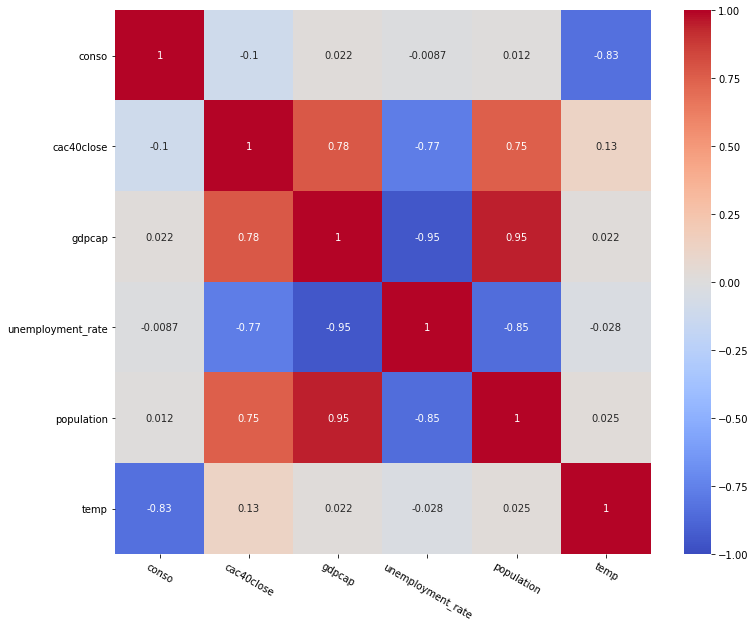

In [0]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conso.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', ax=ax)
plt.xticks(rotation=-30)
plt.yticks(rotation=0)
plt.show()

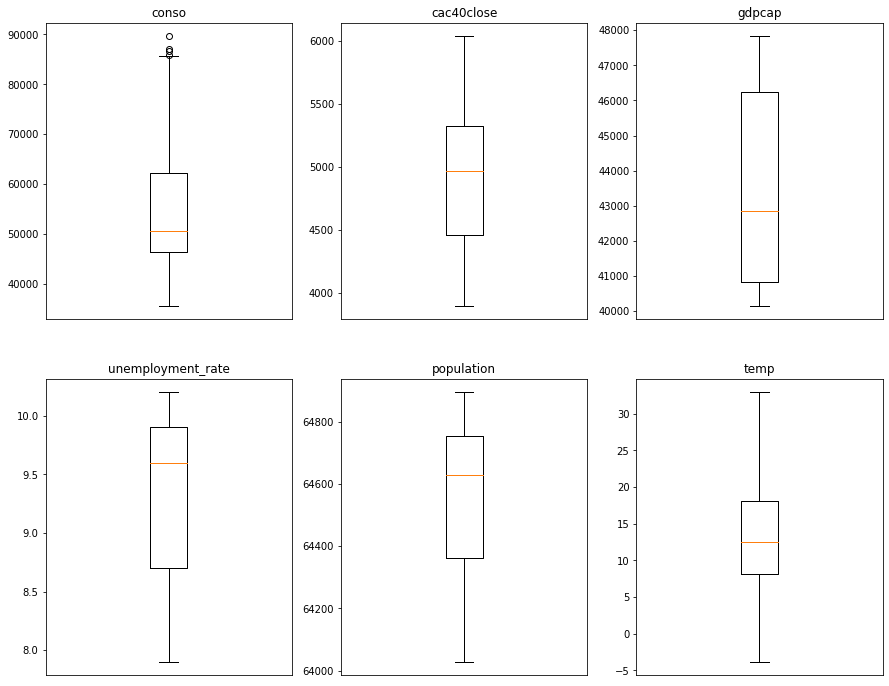

In [0]:
fig, axs = plt.subplots(2,3, figsize=(15,12))
axs[0, 0].boxplot(conso['conso'])
axs[0, 0].set_title('conso')
axs[0, 1].boxplot(conso['cac40close'])
axs[0, 1].set_title('cac40close')
axs[0, 2].boxplot(conso['gdpcap'])
axs[0, 2].set_title('gdpcap')
axs[1, 0].boxplot(conso['unemployment_rate'])
axs[1, 0].set_title('unemployment_rate')
axs[1, 1].boxplot(conso['population'])
axs[1, 1].set_title('population')
axs[1, 2].boxplot(conso['temp'])
axs[1, 2].set_title('temp')

# Removing xticks
for ax in axs.flat:
  ax.set_xticks([])

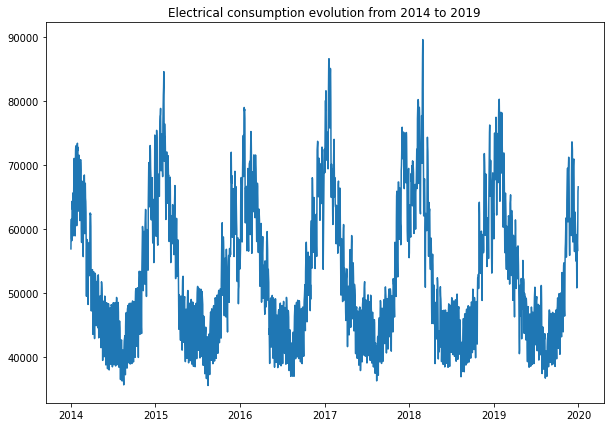

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
ax = plt.plot(dataconso.index, dataconso['conso'])
plt.title('Electrical consumption evolution from 2014 to 2019')
plt.show()

In [0]:
consocopy = dataconso.copy()

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(consocopy)

consocopy_norm = scaler.transform(consocopy)
consocopy_norm = pd.DataFrame(consocopy_norm)
consocopy_norm.columns = dataconso.columns

print(consocopy_norm.head())
print(consocopy_norm.describe())

      conso  cac40close    gdpcap  ...  pop_60_75    pop_75      temp
0  0.270816   -1.296573 -1.307414  ...   -1.49167 -1.514496 -0.655733
1  0.613441   -1.439400 -1.307414  ...   -1.49167 -1.514496 -0.470914
2  0.705185   -1.397032 -1.307414  ...   -1.49167 -1.514496 -0.345533
3  0.421902   -1.397032 -1.307414  ...   -1.49167 -1.514496 -0.614672
4  0.391253   -1.397032 -1.307414  ...   -1.49167 -1.514496 -0.954757

[5 rows x 10 columns]
              conso    cac40close  ...        pop_75          temp
count  2.191000e+03  2.191000e+03  ...  2.191000e+03  2.191000e+03
mean  -7.904828e-17 -4.134833e-17  ...  9.567883e-15 -1.231329e-16
std    1.000228e+00  1.000228e+00  ...  1.000228e+00  1.000228e+00
min   -1.725075e+00 -2.126951e+00  ... -1.514496e+00 -2.646259e+00
25%   -7.038110e-01 -9.591724e-01  ... -6.369869e-01 -7.758786e-01
50%   -3.176654e-01  9.959973e-02  ... -3.199319e-01 -9.407330e-02
75%    7.628871e-01  8.500261e-01  ...  7.052875e-01  7.868115e-01
max    3.328341e+00  

In [0]:
consocopy_norm.to_csv('conso_norm.csv')

In [0]:
from google.colab import files
files.download("conso_norm.csv")